# Decision Trees and Support Vector Machines (SVMs)

**Objective:** This notebook explores two powerful and popular supervised learning models. We will first implement a Decision Tree for both regression (predicting house prices) and classification (predicting liver disease). Then, we will introduce the Support Vector Machine (SVM) as an alternative method for classification tasks.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from utils.helper import load_and_summarize, split_data, evaluate_regressor, evaluate_classifier, scale_dataframe

## Part 1: Decision Tree for Regression

Our first task is to predict house prices using a Decision Tree Regressor. Unlike linear models, decision trees can capture non-linear relationships by creating a set of if-then-else rules.


In [26]:
df_housing = load_and_summarize("CSV Files/processed_housing_data.csv")

--- Loading processed_housing_data.csv ---
First 5 rows:
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1  0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2  0.909091  0.571134       0.4   0.333333  0.333333       1.0        0.0   
3  0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
4  0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0       0.0              0.0              1.0  0.666667       1.0   
1       0.0              0.0              1.0  1.000000       0.0   
2       1.0              0.0              0.0  0.666667       1.0   
3       1.0              0.0              1.0  1.000000       1.0   
4       1.0              0.0              1.0  0.666667       0.0   

   furnishingstatus  
0               1.0  
1               1.0  

In [27]:
X_train_h, X_test_h, y_train_h, y_test_h = split_data(df_housing, 'price')

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_h, y_train_h)

DecisionTreeRegressor(random_state=42)

In [28]:
y_pred_h = tree_reg.predict(X_test_h)
print("\n--- Model Performance ---")
evaluate_regressor(y_test_h, y_pred_h , model_name="Decision Tree Regressor")


--- Model Performance ---
MSE for Decision Tree Regressor: 0.0232


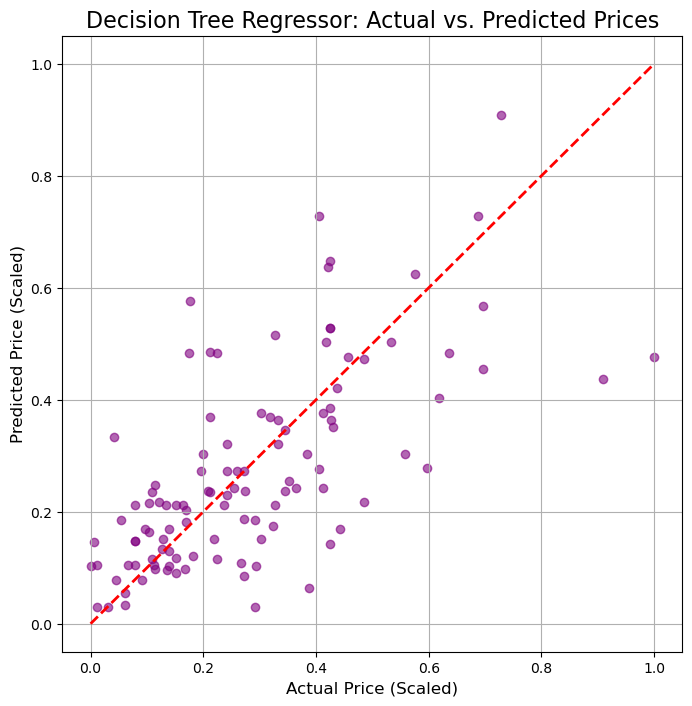

In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_h, y_pred_h, alpha=0.6, color='purple')
plt.plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], '--', lw=2, color='red')
plt.title('Decision Tree Regressor: Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price (Scaled)', fontsize=12)
plt.ylabel('Predicted Price (Scaled)', fontsize=12)
plt.grid(True)
plt.show()

## Part 2: Decision Tree for Classification

Next, we will use a Decision Tree to classify patients as having liver disease or not. This demonstrates the versatility of the algorithm.


In [30]:
df_liver = load_and_summarize('CSV Files/liver_patient.csv')

--- Loading liver_patient.csv ---
First 5 rows:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  


In [31]:
df_liver = df_liver.drop('Gender', axis=1)
df_liver.dropna(inplace=True)

In [32]:
df_liver_scaled = scale_dataframe(df_liver)
df_liver_scaled.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0


In [33]:
X_train_l, X_test_l, y_train_l, y_test_l = split_data(df_liver_scaled, 'Dataset')

In [34]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_l, y_train_l)

DecisionTreeClassifier(random_state=42)

In [35]:
predictions_clf = tree_clf.predict(X_test_l)
print("\n--- Model Performance ---")
evaluate_classifier(y_test_l, predictions_clf, model_name="Decision Tree Classifier")


--- Model Performance ---
Accuracy for Decision Tree Classifier: 0.6466


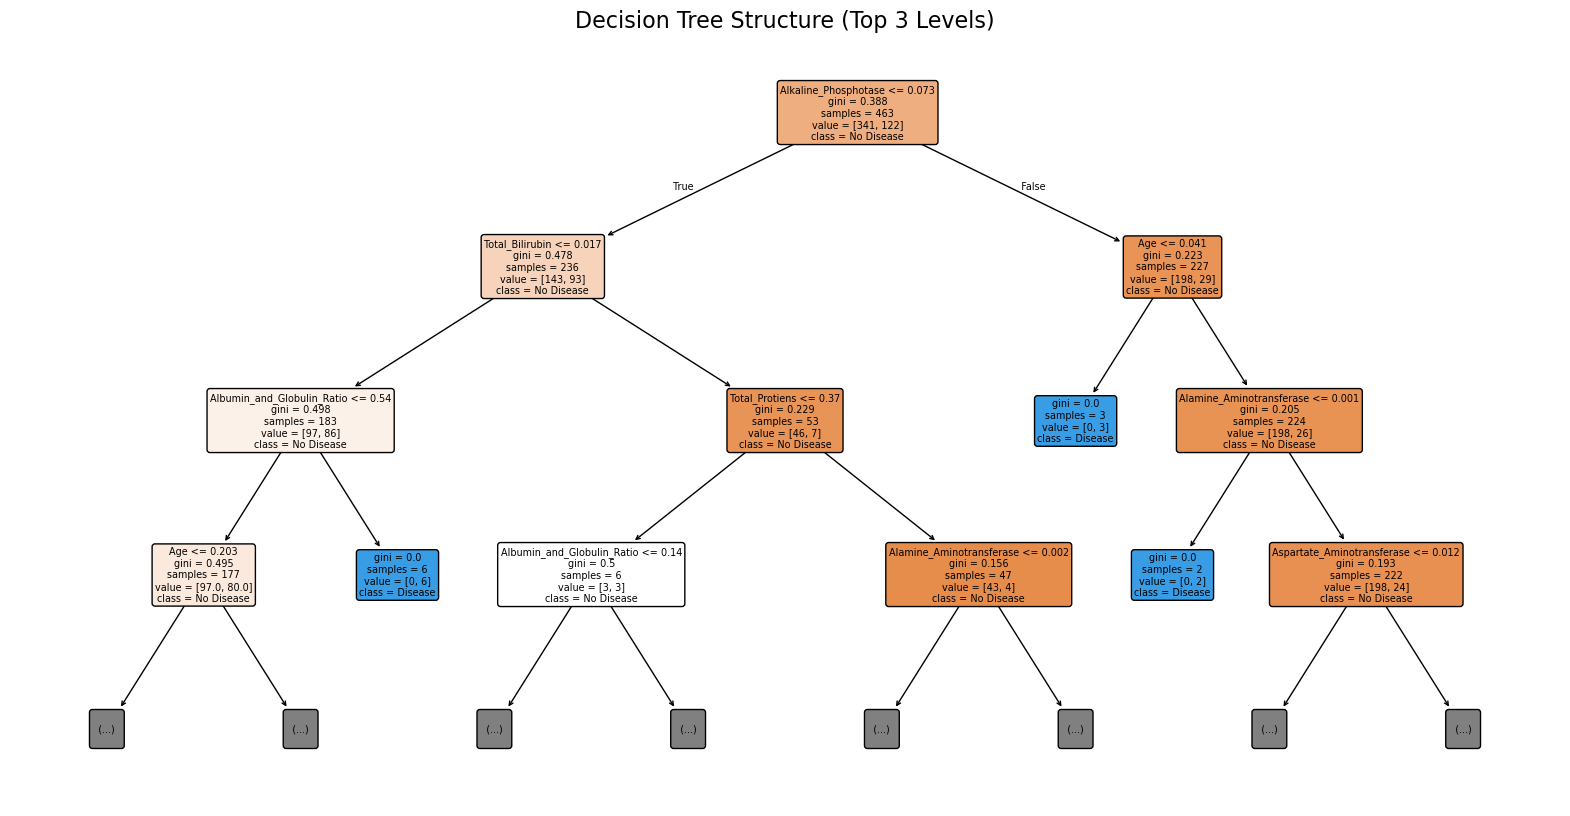

In [36]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, 
          feature_names=X_train_l.columns, 
          class_names=['No Disease', 'Disease'], 
          filled=True, 
          rounded=True,
          max_depth=3) # Limit depth for readability
plt.title("Decision Tree Structure (Top 3 Levels)", fontsize=16)
plt.show()

## Part 3: Support Vector Machine (SVM) for Classification

As an alternative to the Decision Tree, we will now use a Support Vector Machine (SVM) on the same liver patient dataset. SVMs work by finding the optimal hyperplane that best separates the classes in the data.

In [40]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_l, y_train_l)

SVC(random_state=42)

In [41]:
predictions_svm = svm_clf.predict(X_test_l)
print("\n--- Model Performance ---")
evaluate_classifier(y_test_l, predictions_svm, model_name="SVM Classifier")


--- Model Performance ---
Accuracy for SVM Classifier: 0.6293


## Key findings

The Decision Tree Regressor achieved a low MSE of 0.0232 on the housing price task, performing better than a simple linear model and demonstrating its ability to handle complex feature interactions.

On the classification task, the Decision Tree Classifier achieved a solid accuracy of 64.66%. Its main advantage is its interpretability, as the tree structure can be visualized to understand its decision logic.

The SVM Classifier performed slightly less accurately on this dataset with 62.93%. This highlights the important principle of "No Free Lunch" in machine learning: no single model is best for every problem, and it's crucial to test multiple architectures.